# Cheaters???

My friend who plays PUBG said that there are cheaters in this game.
If it's true, we should probably remove such players from the training dataset not to get the model confused.
> 这游戏里有很多作弊的
> 如果这是真的，我们可能应该从训练数据集中删除这样的player，以免混淆模型。

I learned that there are some types of cheats.
> 我了解到有一些作弊类型。

<div align="center">
    <img src="https://cdn.mos.cms.futurecdn.net/36pdCgyXDgKmbqSpxnJ6Ue-650-80.png" width="640">
    <a href="https://www.gamesradar.com/pubg-cheats-explained/">PlayerUnknown's Battlegrounds cheats explained | GamesRadar+</a>
</div>

## Aim Hacks

> They will take control of a players aim and automatically target it towards opponents.

> 他们将控制玩家的目标并自动将其瞄准对手。

## Speed Hacks

> They usually give the player a massive speed increase, meaning they can go from one side of the map to the other in seconds.
> 他们通常给玩家一个巨大的速度提升，这意味着他们可以在几秒钟内从地图的一边走到另一边。

## Recoil Hacks

> automatically manage the recoil. This means all they have to do is press the fire button and don’t have to adjust their mouse to account for the recoil, as the script will do it all for them and every shot will go exactly where they want it to.
> 自动管理反冲。这意味着他们所要做的就是按下开火按钮，而不需要调整鼠标来调整反冲，因为脚本会为他们做所有的事情，而且每一次射击都会精确地到达他们想要的地方。

## Wall Hacks

> Wall hacks basically allow cheaters to see other players through walls, or add extra UI elements to reveal a players location.
> 透视基本上允许作弊者通过墙壁看到其他玩家，或者添加额外的UI元素来显示玩家的位置。


# How cheaters look like

Now I have some ideas about cheaters.

- Acquiring 100 weapons without moving
- Killing 100 players without moving
- 100/100 kills are headshots
- Reviving 100 times
- ...

Let's take a look at the actual data.

In [1]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
train = pd.read_csv('../data/train_V2.csv')
display(train.head())
display(train.describe())

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [3]:
def show_countplot(column):
    plt.figure(figsize=(12,4))
    sns.countplot(data=train, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(12, 4))
    sns.distplot(train[column], bins=50)
    plt.show()

# Aim Hacks

## kills

- ID: 299122 got 57 weapons, killed 40 players, but his total distance is 50.26m ???
- ID: 94553 killed 48 players without healing ???
- ID: 4303492 killed 42 players and all of them were run over by his vehicle ???

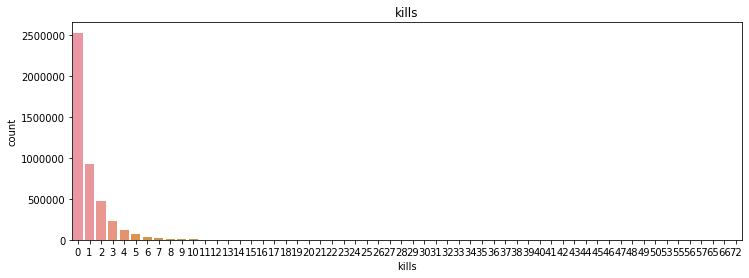

In [4]:
show_countplot('kills')

In [5]:
train[train['kills'] >= 40]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.0,0,0.0,0,0,23.710,61,0,0.7000
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,0.0,0,0.0,1,0,718.300,16,1500,1.0000
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0,0.0,0,0.0,0,0,1036.000,60,0,1.0000
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,0,0.0,0,0.0,0,0,24.270,56,0,1.0000
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,0.0,0,0.0,0,0,85.550,66,0,1.0000
781794,36c5d7b936e078,fa23463effba78,b06aa721ab324a,13,0,4750.0,0,8,6,1,...,0,0.0,0,0.0,0,0,370.900,54,1500,1.0000
797111,7f3edd982813e6,10a20932a5cf8f,cfa2775c9ef944,6,0,5406.0,0,16,14,1,...,0,0.0,0,0.0,0,0,287.500,50,1500,1.0000
917841,f24af40d9db7f5,db5cc31ce34729,17c643ab998ecb,7,0,3781.0,0,10,3,1,...,0,15.9,0,0.0,0,0,889.300,77,1500,1.0000
1248348,80ac0bbf58bfaf,1e54ab4540a337,08e4c9e6c033e2,5,0,6375.0,0,21,4,1,...,0,0.0,0,0.0,0,0,1740.000,23,0,1.0000
1378200,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,...,0,0.0,0,0.0,0,0,46.710,72,0,0.7778


## Headshot rate

"headshot rate = 100%" doesn''t look cheaters to me. They look good players and actually they won the game!

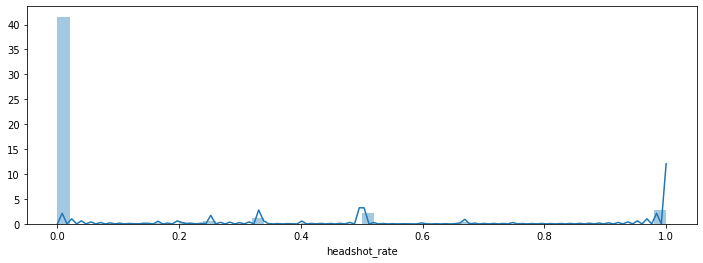

In [6]:
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)
show_distplot('headshot_rate')

In [7]:
train[(train['headshot_rate'] >= 1) & (train['kills'] >= 10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.00,0,0.0,0,0,2939.0,5,0,0.8462,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,4720.00,0,0.0,0,0,3422.0,8,1560,1.0000,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0.00,0,0.0,0,0,2105.0,5,1587,1.0000,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,5187.00,0,0.0,2,0,2761.0,7,1519,0.9630,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1018.00,0,0.0,0,0,2458.0,4,1562,1.0000,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,5246.00,0,0.0,0,0,2932.0,4,0,1.0000,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,408.90,0,0.0,0,0,2450.0,7,1468,1.0000,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,2048.00,0,0.0,0,0,3915.0,5,0,1.0000,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,0.00,0,0.0,0,0,3108.0,7,1500,1.0000,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,0.00,0,140.8,0,0,2339.0,4,0,1.0000,1.0


## longestKill

Lucky or Cheater? My friend told me that 1km sniper shot is not impossible in this game.

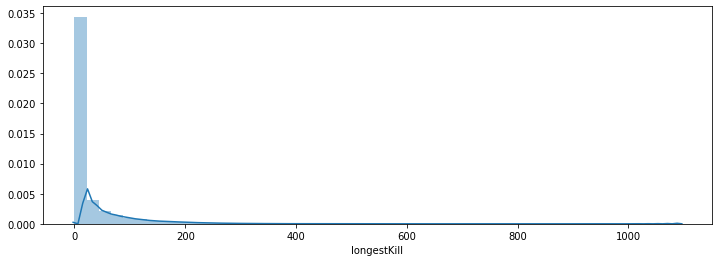

In [8]:
show_distplot('longestKill')

In [9]:
train[train['longestKill'] >= 1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,723.20,0,0.00,0,1,3052.00,9,0,0.9231,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.00,0,0.00,0,0,48.87,38,1500,0.5385,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,1717.00,0,0.00,0,0,1264.00,26,0,1.0000,0.000000
523088,1ff9763ca30279,7fb3a83ebb050d,838cb9a3c94598,0,0,151.2,0,0,0,45,...,0.00,0,0.00,0,0,0.00,3,0,0.7143,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.00,0,0.00,0,0,29.21,30,1500,0.6000,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,2085.00,0,0.00,0,0,1074.00,22,0,0.0000,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.00,0,0.00,0,0,569.50,18,0,0.9091,0.500000
996713,f4082eee4c45e9,4d02ce950f74fc,838cb9a3c94598,1,0,916.4,0,0,0,17,...,0.00,0,0.00,4,0,0.00,15,0,1.0000,0.000000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.00,0,0.00,0,0,832.50,9,1500,0.2857,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.00,0,0.00,0,0,2848.00,4,1500,0.9412,0.466667


## teamKills

Hmm... they are just madmen?

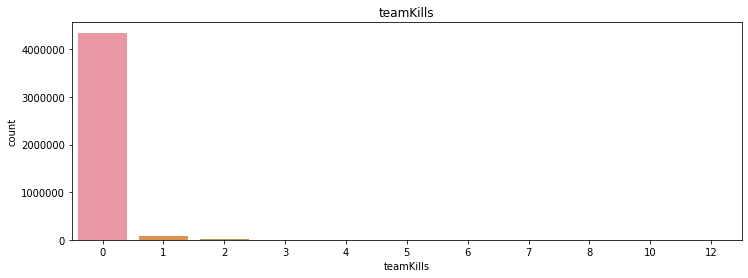

In [10]:
show_countplot('teamKills')

In [11]:
train[train['teamKills'] >= 5]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
187241,863f84c638697f,629a53dc72ae7f,8fac94db3260a0,1,0,470.90,0,1,0,35,...,0.0,0,0.0,5,0,532.20,5,0,0.8571,0.200000
407630,42c479cb27b322,fc5855b508b2a6,8754837629fdfc,4,0,1256.00,0,0,0,6,...,0.0,0,0.0,10,0,88.05,13,1500,0.0000,0.000000
642527,dcd4b7d24d6ba3,40ef07cfa8ab74,aaedc7ada6a72c,0,0,464.90,12,2,13,16,...,0.0,0,0.0,7,0,0.00,43,0,0.0000,0.500000
948394,4749879721f43d,50af00a6f08378,a97f4f50bd636b,0,0,1410.00,0,0,0,3,...,0.0,0,0.0,10,0,147.40,28,1500,0.0000,0.000000
1377044,af523634083079,3dbc8f6647fad5,8754837629fdfc,3,0,2674.00,0,0,0,1,...,0.0,0,0.0,12,0,106.60,8,1500,1.0000,0.000000
1920247,eae85d4eec1be5,eda174acfb503b,4c6b1a0e4cb346,0,0,75.46,0,0,5,47,...,0.0,0,0.0,5,0,0.00,17,0,0.0000,0.000000
2604229,c5939705993236,eda174acfb503b,4c6b1a0e4cb346,1,0,563.10,0,3,10,16,...,0.0,0,0.0,5,0,407.90,31,0,0.0000,0.300000
2961722,655204a8f7b8e0,ad0e7c2dfc4935,a397d79ddb057c,3,0,970.70,12,4,9,5,...,0.0,0,0.0,5,0,706.30,19,0,1.0000,0.571429
3187704,aaca9a61f32aed,da2f0c9103d9fb,fa373e28ff5062,0,1,262.20,0,1,0,44,...,0.0,0,0.0,5,0,1280.00,7,0,0.0714,0.500000
3384401,a66cd232a73d3f,eda174acfb503b,4c6b1a0e4cb346,1,0,741.00,0,1,4,26,...,0.0,0,0.0,5,0,0.00,22,0,0.0000,0.166667


# Speed Hacks

I think the map is 8*8 km and each yellow square is 1km.

<div align="center">
    <img src="https://d1u5p3l4wpay3k.cloudfront.net/battlegrounds_gamepedia_en/thumb/e/ea/Map.jpg/1600px-Map.jpg?version=24add1e17865d696a24f50bcc3f27da5" width="640">
    <a href="https://pubg.gamepedia.com/MapsMaps">PLAYERUNKNOWN'S BATTLEGROUNDS Wiki</a>
</div>

I want to measure how long it takes to run 1km in this game. Looking at the data, I have no idea how they ran long distance without being killed.
 
- walkDistance max:  17km 300m
- rideDistance max: 48km 390m
- swimDistance max: 5km 286m

## Distance

But they didn't kill players so much = It's okay to ignore?

In [12]:
train[['walkDistance', 'rideDistance', 'swimDistance']].describe()

,walkDistance,rideDistance,swimDistance
count,4.446966e+06,4.446966e+06,4.446966e+06
mean,1.154218e+03,6.061157e+02,4.509322e+00
std,1.183497e+03,1.498344e+03,3.050220e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.551000e+02,0.000000e+00,0.000000e+00
50%,6.856000e+02,0.000000e+00,0.000000e+00
75%,1.976000e+03,1.909750e-01,0.000000e+00
max,2.578000e+04,4.071000e+04,3.823000e+03


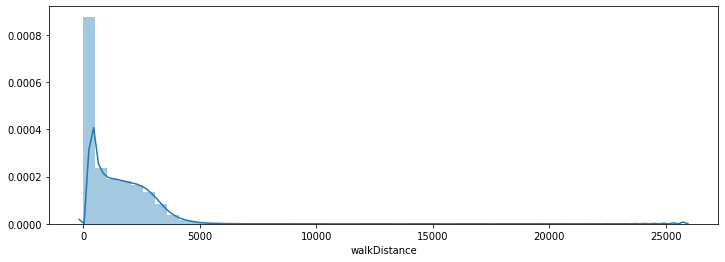

In [13]:
show_distplot('walkDistance')

In [14]:
train[train['walkDistance'] >= 13000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.4212,0,9.882,0,0,13530.0,7,0,0.8163,0.000000
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.00,0,0,0,46,...,0.0078,0,381.900,0,0,25780.0,0,0,0.9894,0.000000
1072113,692e7657b6e340,10baa5ce3cdffe,ad7403ad4d20a9,0,1,0.00,0,0,5,50,...,0.0198,0,15.270,1,0,13040.0,4,0,0.6786,0.000000
1137979,3c23cf6c61171f,90b6aaaa2a16b7,a52c5ac7c18311,0,2,0.00,0,0,27,41,...,0.0548,0,80.340,0,0,13160.0,3,0,0.9643,0.000000
1188935,2dd8f83eb3bd7f,d1e7809ff69bb4,c8585bc8a88aa6,0,0,0.00,0,0,0,44,...,1258.0000,0,180.700,0,0,13360.0,4,0,0.9643,0.000000
1797162,7b9a750b17e9c6,2d00192e4029c5,6fe77402ddb0e1,0,0,0.00,0,0,0,55,...,0.0401,0,129.400,0,0,16250.0,3,0,0.6000,0.000000
2078996,1284474083cc33,fa7e10443cc7df,c62835e88e61a6,0,2,0.00,0,0,3,48,...,847.7000,0,256.900,0,0,14250.0,8,0,0.8000,0.000000
2238900,861d1e5a63f3e6,1da6a90addf96d,16f2c51578f323,0,1,0.00,0,0,5,46,...,0.0111,0,389.500,0,0,15370.0,7,0,0.8125,0.000000
2395009,d6d37216c02c17,56dd8821cacb32,f27850950d5597,0,3,273.30,0,0,1,11,...,1575.0000,0,59.050,0,0,15130.0,3,1583,1.0000,0.000000
2699199,48aec8fdb632cc,a76381e42c197a,a92a008e4a62c0,1,10,471.10,0,0,7,7,...,1986.0000,0,34.400,0,0,13000.0,5,0,0.9787,0.000000


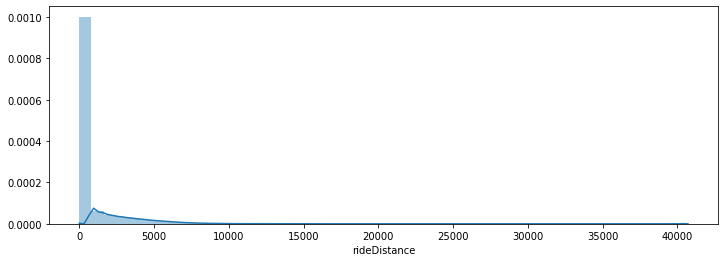

In [15]:
show_distplot('rideDistance')

In [16]:
train[train['rideDistance'] >= 30000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
426708,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.000,0,0,2,43,...,31960.0,0,0.00,0,0,402.10,3,1449,0.8171,0.0
605623,8dee54600c67ca,e77f3e175b5959,26bc606cdae6bf,0,0,11.210,0,0,0,27,...,33970.0,0,0.00,0,0,1641.00,0,1498,0.6800,0.0
1214637,470dca70fbef4d,d44161e5d29c1a,c7d52d5aaff270,0,0,127.300,0,0,8,24,...,31960.0,1,0.00,0,0,642.00,1,0,0.9787,0.0
1232004,2c5add87b29a8c,1d9d7faa352311,ef2ae297b170f3,0,7,196.900,0,0,4,24,...,30030.0,0,53.38,0,0,1328.00,2,1565,0.8866,0.0
1232362,4bf27787223351,b0140dd17f3238,5ed9c405f7e71d,0,1,0.000,0,0,10,47,...,31010.0,0,0.00,1,0,1473.00,3,0,0.7979,0.0
1361247,f09d0c99127850,4ca387960d74a7,93aa204e9c193e,0,2,265.600,0,0,4,10,...,35400.0,0,0.00,0,0,1912.00,7,1538,1.0000,0.0
1713773,239905dd1f3787,da3d922a92ace5,692bd6a11b86c8,0,0,141.200,0,0,1,21,...,31500.0,0,0.00,0,0,448.20,3,1537,0.9474,0.0
1725337,9f14f77b6dd9b6,8a2a8ae2506323,904b5fa7f59bc5,0,2,2.389,0,0,5,19,...,37670.0,0,0.00,0,0,542.10,2,1565,0.6944,0.0
2137063,73b793b4e7523f,f4444641af7e5c,6385f7641268c3,0,0,0.000,0,0,0,52,...,31370.0,0,0.00,0,0,28.76,0,0,0.7204,0.0
2700691,3428324a089608,fa77b4ac736dbf,9b1c87f4016f47,0,1,31.270,0,0,0,46,...,31290.0,0,0.00,0,0,174.10,1,1530,0.8557,0.0


# Items/Supplies Hacks

Item/Supplies make a game advantageous. Let's see how many items/supplies players got in a game.

## weaponsAcquired

Is `weaponsAcquired > 60` possible? If the player moved long distance...?

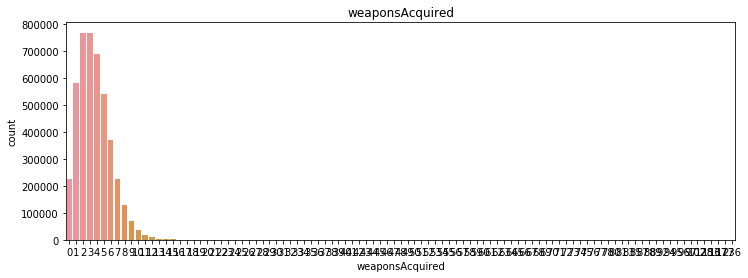

In [17]:
show_countplot('weaponsAcquired')

In [18]:
train[train['weaponsAcquired'] >= 60]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
88852,b45b70a8d261e5,894d0860012ee1,17dea22cefe62a,8,0,1551.0,0,2,6,18,...,0.0,0,0.0,0,0,26.06,61,0,0.2857,0.142857
100009,6960550b7f37b2,65bcc1e5d4f168,17dea22cefe62a,7,0,2028.0,0,5,6,15,...,0.0,0,0.0,0,0,274.50,63,0,0.5714,0.277778
104825,4fe1c1b84d0e4c,62bc19a85c2ed8,17dea22cefe62a,3,0,2651.0,0,3,3,9,...,3621.0,0,0.0,0,0,1024.00,71,0,0.9286,0.125000
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0.0,0,0.0,0,0,23.71,61,0,0.7000,0.250000
180523,aa4031a9ba3fbf,04f57c0cfb1306,5921b55b9e96b5,7,0,2869.0,0,2,5,5,...,1671.0,0,0.0,0,0,1436.00,72,0,0.7333,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179101,fd1f9dcb35f675,9e4c79923e5ab9,6680c7c3d17d48,10,2,2593.0,0,3,1,18,...,0.0,0,0.0,0,0,961.10,70,0,0.1429,0.157895
4193347,23e46b7521aeca,8aa4348ad1274d,0f09bd72c4ba97,3,0,2716.0,0,4,16,3,...,0.0,0,0.0,0,0,0.00,63,1500,0.8571,0.148148
4245873,42ad184cd04a63,3f3c877e8d4030,b06aa721ab324a,9,0,2589.0,0,3,30,5,...,1951.0,0,0.0,0,0,1331.00,67,1500,0.6667,0.107143
4288517,ae95a536f9b824,3bf6589447e952,f900de1ec39fa5,11,0,1534.0,0,5,0,10,...,1430.0,0,0.0,0,0,1349.00,92,0,0.1000,0.250000


## heals

Can we say "they were lucky" for players who are `heals >= 40 && kills >= 40` ???

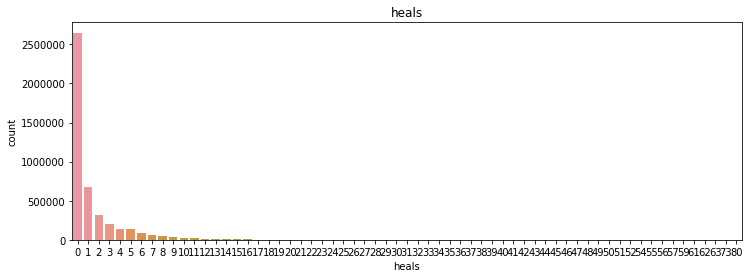

In [19]:
show_countplot('heals')

In [20]:
train[train['heals'] >= 50]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.000,0,0,52,49,...,0.0,0,3.443,0,0,1340.0,3,1543,0.8333,0.0
700615,512ca0f7c6729b,de2c3988154e5e,03a24daa0f3e65,0,3,0.000,3,0,61,48,...,662.8,0,0.000,1,0,963.8,2,0,0.6364,0.0
807030,1b1d77a24be1e1,4b83c72836d02e,109b5a0176fc3e,0,5,0.000,0,0,57,46,...,2583.0,0,24.970,0,0,3003.0,5,0,0.8617,0.0
996709,6737eed1cf8dfc,12cc81f7d2eb4d,5f9a59a3ef190d,0,6,1.824,0,0,63,37,...,3906.0,0,0.000,0,0,1752.0,4,1516,0.8481,0.0
1171133,62f19f94637886,5cbe93968726ee,3be3bbabeb41f3,0,4,100.000,0,0,50,22,...,0.0,0,0.000,0,0,3776.0,5,0,0.9783,0.0
1491736,d124f43ee5d74f,dd2f436c57ca92,15154e6d9e5333,0,2,94.500,0,1,55,10,...,1846.0,0,0.000,1,0,2117.0,8,0,0.8148,0.5
2067819,2dbfd2d0a51710,c242313874f3da,3c8d50f42ead8d,1,7,358.100,1,0,59,27,...,2018.0,0,0.000,0,0,3131.0,7,1602,0.8750,0.0
2322626,edfd3c24340b50,86a65f3b07a416,298a1428dc889f,0,5,152.200,2,1,52,23,...,693.5,0,0.000,1,0,1882.0,6,0,0.9231,1.0
2372719,f0e15bbbe1a8f1,7a0adcf5383a9a,a6473a027234d9,3,3,179.700,2,1,54,10,...,2590.0,0,0.000,0,0,3169.0,6,0,1.0000,0.5
2636572,60cbdf67572802,8c23ae92140d71,56c24019494299,0,5,0.000,0,0,50,45,...,0.0,0,0.000,0,0,2897.0,4,0,0.7241,0.0


Even if you successfully find a cheater, you still have several options about how to deal with cheaters.

- Remove the player
- Remove the group
- Remove the match
- Leave it as it is

Do we need to leave it as it is if there are cheaters in the test dataset as well?

# Zombies!!!

Kyle Beck pointed out that there is a zombie mode in PUBG! (Thank you for your comment!)

<div align="center">
    <img src="http://cdn.gamer-network.net/2018/metabomb/pubghowtoplayzombiemode.JPG" width="640">
    <a href="https://www.metabomb.net/pubg/gameplay-guides/pubg-how-to-play-zombie-mode">PUBG: How to play zombie mode | Metabomb</a>
</div>
    

The zombie mode is a match like "A few humans VS A large amount of zombies". It makes sense that a few players killed a large amount of players in this game. Let's see if such matches are included in this dataset.

First, let's calculate the number of players in each team.

In [21]:
agg = train.groupby(['groupId']).size().to_frame('players_in_team')
train = train.merge(agg, how='left', on=['groupId'])
train[['matchId', 'groupId', 'players_in_team']].head()

,matchId,groupId,players_in_team
0,a10357fd1a4a91,4d4b580de459be,4
1,aeb375fc57110c,684d5656442f9e,4
2,110163d8bb94ae,6a4a42c3245a74,2
3,f1f1f4ef412d7e,a930a9c79cd721,1
4,6dc8ff871e21e6,de04010b3458dd,1


In [22]:
train[train['matchId']=='a10357fd1a4a91'][['matchId', 'groupId', 'players_in_team']].sort_values(by='groupId')

,matchId,groupId,players_in_team
1584671,a10357fd1a4a91,0b4bf93ca082a4,2
863204,a10357fd1a4a91,0b4bf93ca082a4,2
4171661,a10357fd1a4a91,168d1fc8ebe03c,3
3389153,a10357fd1a4a91,168d1fc8ebe03c,3
1041609,a10357fd1a4a91,168d1fc8ebe03c,3
...,...,...,...
2796231,a10357fd1a4a91,edbce070d4ee9d,5
527772,a10357fd1a4a91,edbce070d4ee9d,5
3331756,a10357fd1a4a91,edbce070d4ee9d,5
3120824,a10357fd1a4a91,edbce070d4ee9d,5


In [23]:
train.groupby(['groupId']).size()

groupId
00000c08b5be36    3
00000d1cbbc340    1
000025a09dd1d7    1
000038ec4dff53    3
00003a54230763    2
                 ..
ffffedb6ecff6a    2
fffff305a0133d    2
fffff32bc7eab9    1
fffff7edfc4050    2
fffff98178ef52    1
Length: 2026745, dtype: int64

In [24]:
display(agg)
gc.collect()

,players_in_team
groupId,
00000c08b5be36,3
00000d1cbbc340,1
000025a09dd1d7,1
000038ec4dff53,3
00003a54230763,2
...,...
ffffedb6ecff6a,2
fffff305a0133d,2
fffff32bc7eab9,1


24032

Next, aggregate the number to see min, max, mean, and variance.

In [25]:
agg = train.groupby(['matchId']).agg({'players_in_team':['min','max','mean']})
display(agg)
display(agg.columns)
display(agg.columns.ravel())

players_in_team              
                           min max      mean
matchId                                     
0000a43bce5eec               1   6  3.926316
0000eb01ea6cdd               1   7  3.979592
0002912fe5ed71               1   3  1.084211
0003b92987589e               1   4  2.280000
0006eb8c17708d               2   4  2.204301
...                        ...  ..       ...
fffd74b5150cb4               1   8  4.402062
fffe53015be300               1   2  1.103093
fffe562611d981               1   9  5.000000
fffe721f841f85               1   4  2.134021
fffe92232706aa               1   7  4.053763

[47965 rows x 3 columns]

MultiIndex([('players_in_team',  'min'),
            ('players_in_team',  'max'),
            ('players_in_team', 'mean')],
           )

array([('players_in_team', 'min'), ('players_in_team', 'max'),
       ('players_in_team', 'mean')], dtype=object)

In [26]:
agg = train.groupby(['matchId']).agg({'players_in_team': ['min', 'max', 'mean']})
agg.columns = ['_'.join(x) for x in agg.columns.ravel()]
train = train.merge(agg, how='left', on=['matchId'])
train['players_in_team_var'] = train.groupby(['matchId'])['players_in_team'].var()
display(train[['matchId', 'players_in_team', 'players_in_team_min', 'players_in_team_max', 'players_in_team_mean', 'players_in_team_var']].head())
display(train[['matchId', 'players_in_team', 'players_in_team_min', 'players_in_team_max', 'players_in_team_mean', 'players_in_team_var']].describe())

,matchId,players_in_team,players_in_team_min,players_in_team_max,players_in_team_mean,players_in_team_var
0,a10357fd1a4a91,4,1,8,4.333333,NaN
1,aeb375fc57110c,4,1,10,4.626374,NaN
2,110163d8bb94ae,2,1,6,2.367347,NaN
3,f1f1f4ef412d7e,1,1,8,3.923077,NaN
4,6dc8ff871e21e6,1,1,2,1.041237,NaN


,players_in_team,players_in_team_min,players_in_team_max,players_in_team_mean,players_in_team_var
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,0.0
mean,3.205607e+00,1.059766e+00,6.268563e+00,3.205607e+00,NaN
std,2.260985e+00,3.931654e-01,3.338677e+00,1.529624e+00,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN
25%,2.000000e+00,1.000000e+00,4.000000e+00,2.102041e+00,NaN
50%,3.000000e+00,1.000000e+00,6.000000e+00,3.752688e+00,NaN
75%,4.000000e+00,1.000000e+00,8.000000e+00,4.276596e+00,NaN
max,7.400000e+01,2.300000e+01,7.400000e+01,6.405618e+01,NaN


What if the variance is high...?

In [27]:
plt.figure(figsize=(10,4))
for i, match_id in enumerate(train.nlargest(2, 'players_in_team_var')['matchId'].values):
    plt.subplot(1, 2, i + 1)
    sns.distplot(train[train['matchId'] == match_id]['players_in_team'])
plt.show()

<Figure size 720x288 with 0 Axes>

I found **"A few humans VS A large amount of zombies"** !!!
However, I can see few matches that look like the zombie mode = can be outliers.

There are more modes other than that according to <a href="https://pubg.gamepedia.com/Game_Modes">Game Modes - PLAYERUNKNOWN'S BATTLEGROUNDS Wiki</a>

- Solos
- Duos
- Squads

## Solos

 Complete free for all, kill everyone, be the last one alive (`players_in_team_max = 1`).

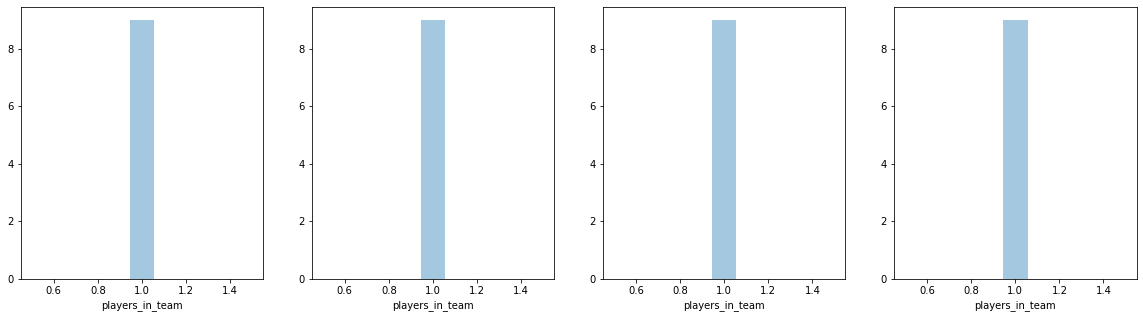

In [28]:
plt.figure(figsize=(20,5))
for i, match_id in enumerate(train[train['players_in_team_max'] == 1]['matchId'].values[:4]):
    plt.subplot(1, 4, i + 1)
    sns.distplot(train[train['matchId'] == match_id]['players_in_team'])
plt.show()

## Duos

You will be paired up with another individual and will compete to be the last ones alive (`players_in_team_max = 2 & variance ≈ 0`).

In [29]:
plt.figure(figsize=(20,5))
for i, match_id in enumerate(train[(train['players_in_team_max'] == 2) & (train['players_in_team_var'] == 0)]['matchId'].values[:4]):
    plt.subplot(1, 4, i + 1)
    sns.distplot(train[train['matchId'] == match_id]['players_in_team'])
plt.show()

<Figure size 1440x360 with 0 Axes>

## Squads

You can team up in groups of 2, 3 or 4 players, or if you prefer, you can still play solo and take on everyone alone in the match (`players_in_team_max = 4 & variance ≈ 0`).

In [30]:
plt.figure(figsize=(20,5))
for i, match_id in enumerate(train[(train['players_in_team_max'] == 4) & (train['players_in_team_var'] > 0)]['matchId'].values[:4]):
    plt.subplot(1, 4, i + 1)
    sns.distplot(train[train['matchId'] == match_id]['players_in_team'])
plt.show()

<Figure size 1440x360 with 0 Axes>

This can be an important feature!

# Predict game mode

(I'm working on clustering matches now...)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [ ]:
train['players_in_team_var'] = train['players_in_team_var'].fillna(-1)
columns = ['players_in_team', 'players_in_team_min', 'players_in_team_max', 'players_in_team_mean', 'players_in_team_var']
data = train.groupby(['matchId']).first()[columns].reset_index()
preprocessor = make_pipeline(StandardScaler(), PCA(n_components=2))
reduced_data = preprocessor.fit_transform(data)
model = KMeans(n_clusters=8)
model.fit(reduced_data)
data['game_mode'] = model.predict(reduced_data)

plt.figure(figsize=(6,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=data['game_mode'])
plt.show()

In [ ]:
data.groupby(['game_mode']).mean().reset_index()[
    ['game_mode', 'players_in_team', 'players_in_team_min', 'players_in_team_max', 'players_in_team_mean', 'players_in_team_var']
].merge(data.groupby(['game_mode']).size().to_frame('count'), how='left', on=['game_mode'])

In [ ]:
plt.figure(figsize=(20,10))
for i, match_id in enumerate(data.groupby(['game_mode']).first()['matchId'].values):
    plt.subplot(2, 4, i + 1)
    sns.distplot(train[train['matchId'] == match_id]['players_in_team']).set_title(f'game_mode: {i}')
plt.show()